In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [25]:
import pandas as pd
import numpy as np
import csv
from scipy.sparse import *
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import surprise
from surprise import Dataset, Reader
from surprise import SVD
from surprise.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [26]:
# load datasets
impression_data = pd.read_csv('impression_data.csv', sep = ',')

In [27]:
total_impression =  impression_data['userId'].value_counts()

In [28]:
# formulate the three-columns matrix
engagement= impression_data[['isClick', 'isComment', 'isZan', 'isShare', 'isViewComment', 'isIntoPersonalHomepage']]
engagement = engagement.sum(axis=1)
Id = impression_data[['userId', 'mlogId']]
df = pd.concat([Id, engagement], axis=1)
df.columns =['userId', 'mlogId', 'engagement']

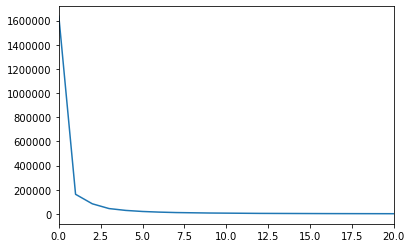

In [29]:
user_engagement = df.groupby('userId')['engagement'].sum()
user_engagement.value_counts().plot(xlim = [0,20])

In [30]:
df_user = pd.DataFrame(columns = ['total_impression', 'total_engagement'])
df_user['total_impression'] = total_impression
df_user['total_engagement'] = user_engagement

In [31]:
kmeans = KMeans(n_clusters=4).fit(df_user)
labels = kmeans.labels_
cluster_results = pd.DataFrame([df_user.index,labels]).T

In [32]:
cluster_results.columns = ['userId', 'cluster']

In [33]:
cluster = cluster_results

In [34]:
cluster

,userId,cluster
0,PCLCKCOCKCHCGCHCICMC,3
1,PCNCGCJCOCOCOCPCNCJC,3
2,PCKCNCICMCLCICKCKCPC,3
3,PCICHCPCPCNCICGCPCPC,3
4,LCNCGCHCOCGCKCKCPC,3
...,...,...
2085597,HCJCICGCLCOCOCOC,0
2085598,KCPCKCGCHCLCMCPCJC,0
2085599,LCLCMCNCJCICLCPCHC,0
2085600,PCOCLCKCHCJCOCPCOC,0


In [2]:
cluster = pd.read_csv('cluster_results.csv')

In [90]:
cluster = cluster[['userId', 'cluster']]
cluster

,userId,cluster
0,PCLCKCOCKCHCGCHCICMC,3
1,PCNCGCJCOCOCOCPCNCJC,3
2,PCKCNCICMCLCICKCKCPC,3
3,PCICHCPCPCNCICGCPCPC,3
4,LCNCGCHCOCGCKCKCPC,3
...,...,...
2085597,HCJCICGCLCOCOCOC,0
2085598,KCPCKCGCHCLCMCPCJC,0
2085599,LCLCMCNCJCICLCPCHC,0
2085600,PCOCLCKCHCJCOCPCOC,0


In [118]:
preds = pd.read_csv('pred_res.csv', names = ['userId', 'pred'])

In [119]:
preds = preds.drop_duplicates()

In [120]:
preds

,userId,pred
0,PCNCHCLCNCNCKCHCMCKC,3
2,PCKCOCLCICMCPCOCJCJC,1
3,PCKCOCLCGCKCICGCICJC,0
4,PCKCPCLCLCJCHCLCKCOC,0
5,PCKCMCGCJCPCMCOCMCMC,1
...,...,...
35968,PCNCKCJCOCICMCKCHCPC,1
35969,PCNCLCKCLCKCPCNCKCHC,0
35970,PCNCLCHCMCOCNCMCKCOC,1
35971,PCNCICPCOCLCHCJCICOC,1


In [121]:
preds_1 = pd.read_csv('pred_res.csv', names = ['userId', 'pred'])
preds_1 = preds_1.drop_duplicates()

In [122]:
preds_1

,userId,pred
0,PCNCHCLCNCNCKCHCMCKC,3
2,PCKCOCLCICMCPCOCJCJC,1
3,PCKCOCLCGCKCICGCICJC,0
4,PCKCPCLCLCJCHCLCKCOC,0
5,PCKCMCGCJCPCMCOCMCMC,1
...,...,...
35968,PCNCKCJCOCICMCKCHCPC,1
35969,PCNCLCKCLCKCPCNCKCHC,0
35970,PCNCLCHCMCOCNCMCKCOC,1
35971,PCNCICPCOCLCHCJCICOC,1


In [123]:
clus = cluster[cluster['userId'].isin(preds_1['userId'])]

In [124]:
preds_1 = preds_1.set_index('userId')

In [125]:
clus = clus.set_index('userId')

In [126]:
acc_check = pd.DataFrame(columns = ['cluster', 'pred'])
acc_check['cluster'] = clus['cluster']
acc_check['pred'] = preds_1['pred']

In [127]:
precision = precision_score(acc_check['cluster'].ravel().astype(int), acc_check['pred'].ravel().astype(int), labels=[1,2,3], average='micro')

In [97]:
cluster.pivot_table(index=['cluster'], aggfunc='size')

cluster
0    2037527
1       3694
2      44127
3        254
dtype: int64

In [128]:
precision

0.022900763358778626

In [129]:
recall = recall_score(acc_check['cluster'].ravel().astype(int), acc_check['pred'].ravel().astype(int), labels=[1,2,3], average='micro')

In [130]:
recall

0.2857142857142857

In [131]:
f1 = 1/(1/precision + 1/recall)
f1

0.02120141342756184

In [132]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(acc_check['cluster'].ravel().astype(int), acc_check['pred'].ravel().astype(int))

In [133]:
accuracy

0.38134103465595176